In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

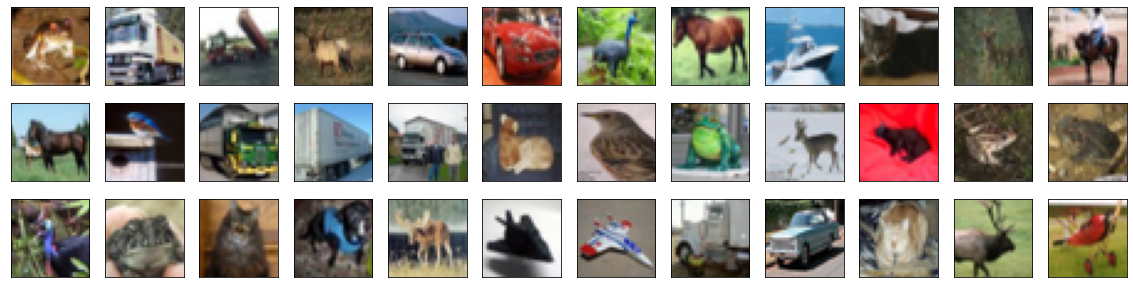

In [3]:
fig = plt.figure(figsize = (20,5))
for i in range(36):
    ax = fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [4]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [5]:
(x_train, x_valid) = x_train[6000:], x_train[:6000]
(y_train, y_valid) = y_train[6000:], y_train[:6000]

In [6]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.np_utils.to_categorical(y_valid, num_classes)

In [7]:
x_train.shape, y_train.shape

((44000, 32, 32, 3), (44000, 10))

In [8]:
x_valid.shape, y_valid.shape

((6000, 32, 32, 3), (6000, 10))

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(x_train)

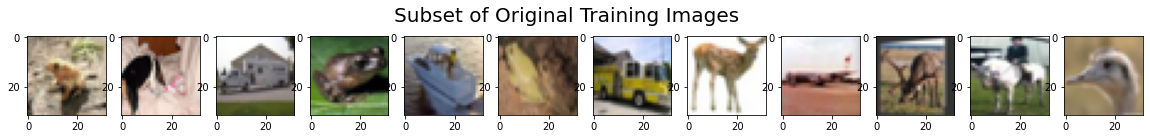

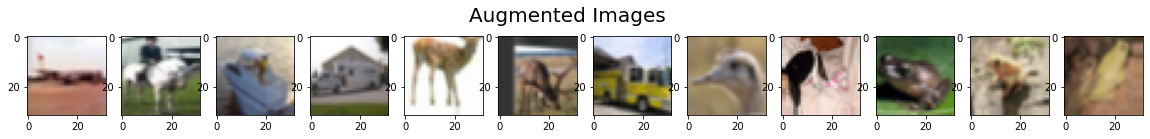

In [10]:
import matplotlib.pyplot as plt
x_train_subset = x_train[:12]

fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1,12,i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize = 20)
plt.show()

fig = plt.figure(figsize = (20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size = 12):
    for i in range(0,12):
        ax = fig.add_subplot(1,12,i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize = 20)
    plt.show()
    break;

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [13]:
from keras.callbacks import ModelCheckpoint   

batch_size = 256
epochs = 100

checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hdf5', verbose=1, save_best_only=True)
model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=(x_valid, y_valid),
                    validation_steps=x_valid.shape[0] // batch_size)

c:\users\reza\anaconda3\envs\tf7\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
171/171 - 15s - loss: 1.9402 - accuracy: 0.2964 - val_loss: 1.6906 - val_accuracy: 0.3873

Epoch 00001: val_loss improved from inf to 1.69062, saving model to aug_model.weights.best.hdf5
Epoch 2/100
171/171 - 12s - loss: 1.6675 - accuracy: 0.3997 - val_loss: 1.4425 - val_accuracy: 0.4850

Epoch 00002: val_loss improved from 1.69062 to 1.44254, saving model to aug_model.weights.best.hdf5
Epoch 3/100
171/171 - 12s - loss: 1.5589 - accuracy: 0.4375 - val_loss: 1.3957 - val_accuracy: 0.5072

Epoch 00003: val_loss improved from 1.44254 to 1.39569, saving model to aug_model.weights.best.hdf5
Epoch 4/100
171/171 - 12s - loss: 1.4962 - accuracy: 0.4623 - val_loss: 1.2878 - val_accuracy: 0.5423

Epoch 00004: val_loss improved from 1.39569 to 1.28781, saving model to aug_model.weights.best.hdf5
Epoch 5/100
171/171 - 12s - loss: 1.4413 - accuracy: 0.4827 - val_loss: 1.2776 - val_accuracy: 0.5428

Epoch 00005: val_loss improved from 1.28781 to 1.27761, saving model to aug_model.weights

171/171 - 12s - loss: 0.8899 - accuracy: 0.6883 - val_loss: 0.7561 - val_accuracy: 0.7327

Epoch 00047: val_loss did not improve from 0.73079
Epoch 48/100
171/171 - 12s - loss: 0.8856 - accuracy: 0.6930 - val_loss: 0.7560 - val_accuracy: 0.7342

Epoch 00048: val_loss did not improve from 0.73079
Epoch 49/100
171/171 - 13s - loss: 0.8872 - accuracy: 0.6897 - val_loss: 0.7394 - val_accuracy: 0.7460

Epoch 00049: val_loss did not improve from 0.73079
Epoch 50/100
171/171 - 12s - loss: 0.8874 - accuracy: 0.6898 - val_loss: 0.7640 - val_accuracy: 0.7345

Epoch 00050: val_loss did not improve from 0.73079
Epoch 51/100
171/171 - 12s - loss: 0.8758 - accuracy: 0.6949 - val_loss: 0.7302 - val_accuracy: 0.7500

Epoch 00051: val_loss improved from 0.73079 to 0.73018, saving model to aug_model.weights.best.hdf5
Epoch 52/100
171/171 - 13s - loss: 0.8801 - accuracy: 0.6941 - val_loss: 0.7463 - val_accuracy: 0.7410

Epoch 00052: val_loss did not improve from 0.73018
Epoch 53/100
171/171 - 13s - loss:


Epoch 00097: val_loss improved from 0.65464 to 0.65235, saving model to aug_model.weights.best.hdf5
Epoch 98/100
171/171 - 13s - loss: 0.8025 - accuracy: 0.7218 - val_loss: 0.6579 - val_accuracy: 0.7750

Epoch 00098: val_loss did not improve from 0.65235
Epoch 99/100
171/171 - 13s - loss: 0.7963 - accuracy: 0.7254 - val_loss: 0.6552 - val_accuracy: 0.7823

Epoch 00099: val_loss did not improve from 0.65235
Epoch 100/100
171/171 - 12s - loss: 0.7984 - accuracy: 0.7238 - val_loss: 0.6728 - val_accuracy: 0.7665

Epoch 00100: val_loss did not improve from 0.65235


In [15]:
model.load_weights('model.weights.best.hdf5')

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print( 'Test accuracy:', score[1])

Test accuracy: 0.744700014591217


In [17]:
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

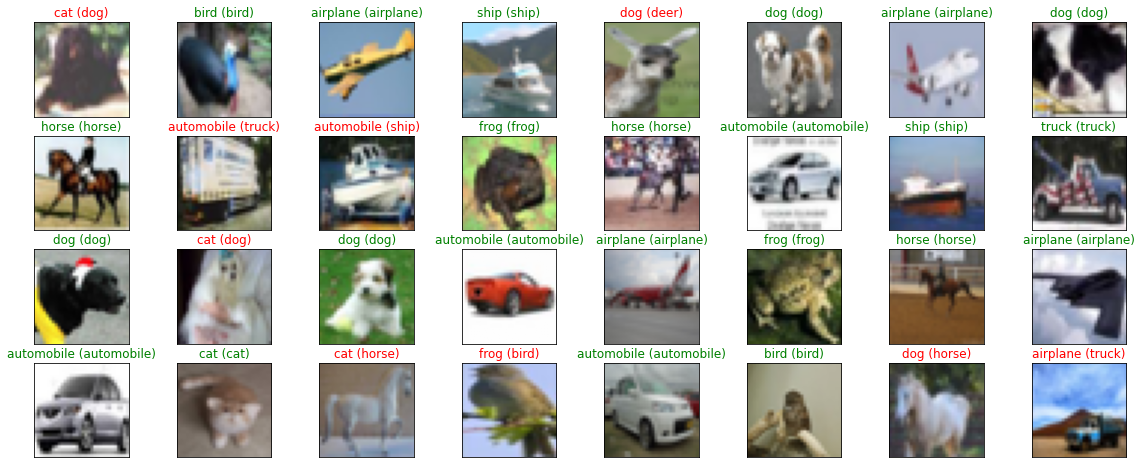

In [18]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))